# OLS(正則化項なし)

w[0]: 0.393906  b: -0.031804


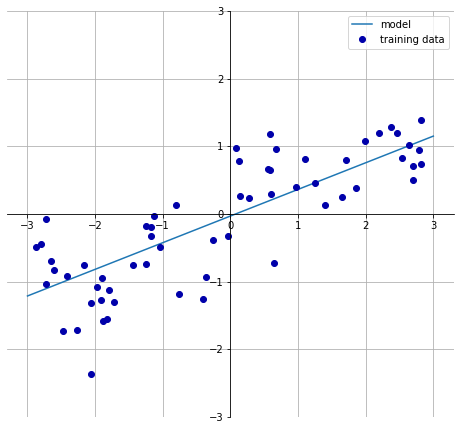

In [1]:

import mglearn
# w[0]: 傾き, b: y切片
mglearn.plots.plot_linear_regression_wave()

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_)) # coef_: 傾き、重み、係数(coefficient) waveデータセットは特徴量が1つしかないので、lr.coef_(np)は1つ
print("lr.intercept_: {}".format(lr.intercept_) ) # intercept_: 切片(intercept)、オフセット、b

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [4]:
# 訓練・テストセットに対する性能
print("Training set score : {:.2f}".format(lr.score(X_train, y_train)))
print("Training set score : {:.2f}".format(lr.score(X_test, y_test)))

Training set score : 0.67
Training set score : 0.66


##### ↑R2が66%はあまり良くないが、訓練・テストセットに対する値が非常に近い。<br>これは適合不足であって過剰適合ではない。<br>特徴量が1つなので、モデルが単純。

In [5]:
# boston_housingデータセット
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [6]:
print("Training set score : {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score : {:.2f}".format(lr.score(X_test, y_test)))

Training set score : 0.95
Test set score : 0.61


In [7]:
##### 精度が大きく異なるのは過剰適合が起きてる兆候。<br>複雑度を制御できるモデルを探す必要がある

# Ridge回帰(L2正則化)

In [9]:
from sklearn.linear_model import Ridge
# defalt alpha=1.0(小さいほど係数が0に近く)
ridge = Ridge().fit(X_train, y_train)
print("train set score :{:.2f}".format(ridge.score(X_train, y_train)))
print("train set score :{:.2f}".format(ridge.score(X_test, y_test)))

train set score :0.89
train set score :0.75


In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("train set score :{:.2f}".format(ridge10.score(X_train, y_train)))
print("train set score :{:.2f}".format(ridge10.score(X_test, y_test)))

train set score :0.79
train set score :0.64


In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("train set score :{:.2f}".format(ridge01.score(X_train, y_train)))
print("train set score :{:.2f}".format(ridge01.score(X_test, y_test)))

train set score :0.93
train set score :0.77


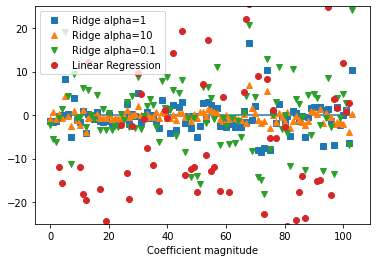

In [26]:
# alphaパラメータのモデルへの影響を定量的に知る。

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="Linear Regression")

plt.xlabel("Coefficient index")
plt.xlabel("Coefficient magnitude")

plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


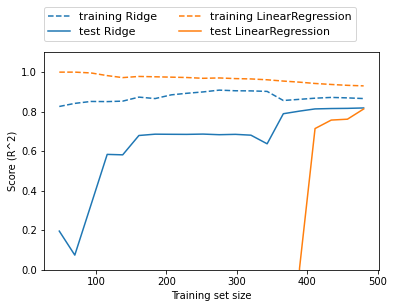

In [28]:
# 学習曲線(モデルの性能をデータセットサイズの関数として示す)

mglearn.plots.plot_ridge_n_samples()

# Lasso回帰<br>(L1正則化:いくつかの係数が0になる=いくつかの特徴量が無視される)

In [35]:
# Lasso(L1正則化:いくつかの係数が0になる=いくつかの特徴量が無視される)
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("train set score :{:.2f}".format(lasso.score(X_train, y_train)))
print("train set score :{:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used :{}".format(np.sum(lasso.coef_ !=0))) # 係数が0ではないもの(104特徴量の内4つしか使っていない)

train set score :0.29
train set score :0.21
Number of features used :4


In [43]:
# alphaを調整する(alpha: 係数を0に向かわせる強さを制御する正則化パラメータ, defalt=1.0)
# alphaを小さくしすぎると、正則化の効果が薄れ過剰適合が発生しLinearRegressionに近く。

lasso001 = Lasso(alpha=0.01, max_iter = 1000000).fit(X_train, y_train) # max_iter: 最大の繰り返し回数

print("train set score :{:.2f}".format(lasso001.score(X_train, y_train)))
print("train set score :{:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used :{}".format(np.sum(lasso001.coef_ !=0))) # 係数が0ではないもの(104特徴量の内33つ使っている)

train set score :0.90
train set score :0.77
Number of features used :33


In [46]:
# alphaを小さくしすぎたため、過剰適合が発生している

lasso00001 = Lasso(alpha=0.0001, max_iter = 1000000).fit(X_train, y_train) # max_iter: 最大の繰り返し回数

print("train set score :{:.2f}".format(lasso00001.score(X_train, y_train)))  
print("train set score :{:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used :{}".format(np.sum(lasso00001.coef_ !=0))) 

train set score :0.95
train set score :0.64
Number of features used :96


Text(0.5, 0, 'Coefficient magnitude')

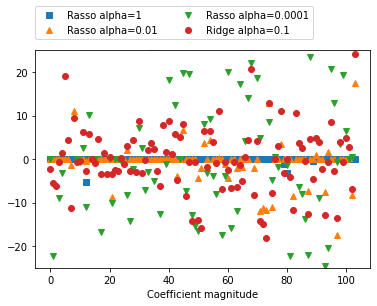

In [62]:
# 係数のプロット

plt.plot(lasso.coef_, 's', label="Rasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Rasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Rasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc = (0,1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.xlabel("Coefficient magnitude")